In [ ]:
import os
import sys

import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
persimmonDF_softRemove = pd.read_excel('/content/drive/MyDrive/01_이미지데이터/persimmonDF_홍시제거.xlsx')
persimmonDF_softRemove.set_index('name', inplace=True)

In [ ]:
persimmonDF_softRemove

,Anthrax,LiftedStem,StinkBug,Wounds,BlackSpot1,BlackSpot2,BlackSpot3,ScaleInsects,Grade
name,,,,,,,,,
persimmon.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14618.0,0.0
persimmon.1,0.0,0.0,0.0,0.0,1456.0,0.0,0.0,15181.0,0.0
persimmon.2,0.0,0.0,0.0,0.0,1980.0,400.0,0.0,732.0,0.0
persimmon.6,0.0,0.0,0.0,0.0,2924.0,506.0,342.0,361.0,0.0
persimmon.17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
persimmon.225,0.0,0.0,13593.0,2346.0,0.0,0.0,0.0,0.0,1.0
persimmon.226,0.0,0.0,6270.0,0.0,1127.0,1088.0,0.0,0.0,1.0
persimmon.227,0.0,0.0,5232.0,0.0,0.0,0.0,8772.0,0.0,1.0


In [ ]:
newDataList = []

i = 0
for index, row in persimmonDF_softRemove.iterrows():
  if(i == int(index.split('.')[1])):
    newDataList.append([index, row.tolist()[0], row.tolist()[1], row.tolist()[2], row.tolist()[3], row.tolist()[4], row.tolist()[5], row.tolist()[6], row.tolist()[7], row.tolist()[8]])
    i+= 1
  else:
    for j in range(i, int(index.split('.')[1]) + 1):
      newDataList.append([f"persimmon.{i}", 0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0])
      i+= 1

In [ ]:
dataFrame = pd.DataFrame(newDataList, columns=["name",	"Anthrax",	"LiftedStem",	"StinkBug",	"Wounds",	"BlackSpot1",	"BlackSpot2",	"BlackSpot3",	"ScaleInsects",	"Grade"])

In [ ]:
dataFrame.set_index('name', inplace=True)

In [ ]:
XData = dataFrame[dataFrame.columns.difference(['Grade'])]
XData

,Anthrax,BlackSpot1,BlackSpot2,BlackSpot3,LiftedStem,ScaleInsects,StinkBug,Wounds
name,,,,,,,,
persimmon.0,0.0,0.0,0.0,0.0,0.0,14618.0,0.0,0.0
persimmon.1,0.0,1456.0,0.0,0.0,0.0,15181.0,0.0,0.0
persimmon.2,0.0,1980.0,400.0,0.0,0.0,732.0,0.0,0.0
persimmon.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
persimmon.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
persimmon.225,0.0,0.0,0.0,0.0,0.0,0.0,13593.0,2346.0
persimmon.226,0.0,1127.0,1088.0,0.0,0.0,0.0,6270.0,0.0
persimmon.227,0.0,0.0,0.0,8772.0,0.0,0.0,5232.0,0.0


#Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(XData, dataFrame.Grade, test_size=0.2, random_state=0)

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train, y_train)
pred = gb_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print(f'GBM 정확도: {accuracy}') # 0.9649

GBM 정확도: 0.9130434782608695


In [88]:
from sklearn.model_selection import GridSearchCV

params_gb = {
    'n_estimators' : [100, 500],
    'max_depth' : ['none', 3,6,8,10,12],
    'min_samples_leaf' : [2,5,7,10],
    'min_samples_split' : [1, 2,3,5,10],
    'max_features' : ['none', 'auto'],
    'learning_rate' : [0.05, 0.1]
}
grid_cv = GridSearchCV(gb_clf, param_grid=params_gb, cv=2, verbose=1)
grid_cv.fit(X_train, y_train)
print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

Fitting 2 folds for each of 960 candidates, totalling 1920 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1920 out of 1920 | elapsed:  6.0min finished


최적 하이퍼 파라미터:
 {'learning_rate': 0.05, 'max_depth': 3, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
최고 예측 정확도: 0.9130


In [89]:
pred = grid_cv.best_estimator_.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('GBM 정확도: {0:.4f}'.format(accuracy)) 

GBM 정확도: 0.9130


In [90]:
scores = pd.DataFrame(grid_cv.cv_results_)
scores[['params','mean_test_score', 'rank_test_score', 'split0_test_score','split1_test_score']].sort_values(by = 'mean_test_score', ascending = False)


,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score
122,"{'learning_rate': 0.05, 'max_depth': 3, 'max_f...",0.913043,1,0.880435,0.945652
208,"{'learning_rate': 0.05, 'max_depth': 6, 'max_f...",0.913043,1,0.891304,0.934783
688,"{'learning_rate': 0.1, 'max_depth': 6, 'max_fe...",0.913043,1,0.880435,0.945652
604,"{'learning_rate': 0.1, 'max_depth': 3, 'max_fe...",0.913043,1,0.880435,0.945652
448,"{'learning_rate': 0.05, 'max_depth': 12, 'max_...",0.913043,1,0.891304,0.934783
...,...,...,...,...,...
931,"{'learning_rate': 0.1, 'max_depth': 12, 'max_f...",NaN,549,NaN,NaN
940,"{'learning_rate': 0.1, 'max_depth': 12, 'max_f...",NaN,528,NaN,NaN
941,"{'learning_rate': 0.1, 'max_depth': 12, 'max_f...",NaN,530,NaN,NaN
950,"{'learning_rate': 0.1, 'max_depth': 12, 'max_f...",NaN,321,NaN,NaN


#Extra Trees Classifier

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

et_clf = ExtraTreesClassifier(n_estimators=5, random_state=2)
et_clf.fit(X_train, y_train)
pred_et = et_clf.predict(X_test)
accuracy_et = accuracy_score(y_test, pred_et)
print(f'Extra Tree 정확도: {accuracy_et}') # 0.9649

Extra Tree 정확도: 0.9130434782608695


In [93]:
params_et = { 
    'n_estimators' : [100, 500],
    'max_depth' : ['none', 3,6,8,10,12],
    'min_samples_leaf' : [2,5,7,10],
    'min_samples_split' : [1, 2,3,5,10],
    'max_features' : ['none', 'auto']
            }

grid_et = GridSearchCV(et_clf, param_grid=params_et, cv=2, verbose=1)
grid_et.fit(X_train, y_train)
print('최적 하이퍼 파라미터:\n', grid_et.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_et.best_score_))

Fitting 2 folds for each of 320 candidates, totalling 640 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


최적 하이퍼 파라미터:
 {'max_depth': 6, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 10}
최고 예측 정확도: 0.6848


[Parallel(n_jobs=1)]: Done 640 out of 640 | elapsed:   35.7s finished


In [94]:
pred_grid_et = grid_et.best_estimator_.predict(X_test)
print('Extra Tree 정확도: {0:.4f}'.format(accuracy_score(y_test, pred_grid_et))) 

scores = pd.DataFrame(grid_et.cv_results_)
scores[['params','mean_test_score', 'rank_test_score', 'split0_test_score','split1_test_score']].sort_values(by = 'mean_test_score', ascending = False)

Extra Tree 정확도: 0.6739


,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score
98,"{'max_depth': 6, 'max_features': 'auto', 'min_...",0.684783,1,0.684783,0.684783
292,"{'max_depth': 12, 'max_features': 'auto', 'min...",0.684783,1,0.684783,0.684783
290,"{'max_depth': 12, 'max_features': 'auto', 'min...",0.684783,1,0.684783,0.684783
230,"{'max_depth': 10, 'max_features': 'auto', 'min...",0.684783,1,0.684783,0.684783
96,"{'max_depth': 6, 'max_features': 'auto', 'min_...",0.684783,1,0.684783,0.684783
...,...,...,...,...,...
283,"{'max_depth': 12, 'max_features': 'none', 'min...",NaN,189,NaN,NaN
284,"{'max_depth': 12, 'max_features': 'none', 'min...",NaN,188,NaN,NaN
285,"{'max_depth': 12, 'max_features': 'none', 'min...",NaN,187,NaN,NaN
286,"{'max_depth': 12, 'max_features': 'none', 'min...",NaN,186,NaN,NaN


In [98]:
data = np.random.random((1000, 100))
data.shape

(1000, 100)

#Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(random_state=2)
lr_clf.fit(X_train, y_train)
pred_lr = lr_clf.predict(X_test)
accuracy_lr = accuracy_score(y_test, pred_lr)
print(f'Logistic Regression 정확도: {accuracy_lr}') # 0.9649

Logistic Regression 정확도: 0.8913043478260869


In [ ]:
params_lr ={'penalty': ['l1', 'l2', 'elasticnet', 'none'],
        'C': [0.01, 0.1, 1, 1, 5, 10],
        'max_iter' : [100,1000]}

grid_lr = GridSearchCV(lr_clf, param_grid=params_lr, cv=2, verbose=1)
grid_lr.fit(X_train, y_train)
print('최적 하이퍼 파라미터:\n', grid_lr.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_lr.best_score_))

Fitting 2 folds for each of 48 candidates, totalling 96 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


최적 하이퍼 파라미터:
 {'C': 5, 'max_iter': 100, 'penalty': 'l2'}
최고 예측 정확도: 0.8696


[Parallel(n_jobs=1)]: Done  96 out of  96 | elapsed:    5.6s finished


In [ ]:
pred_grid_lr = grid_lr.best_estimator_.predict(X_test)
print('로지스틱 회귀 정확도: {0:.4f}'.format(accuracy_score(y_test, pred_grid_et))) 

scores = pd.DataFrame(grid_lr.cv_results_)
scores[['params','mean_test_score', 'rank_test_score', 'split0_test_score','split1_test_score']].sort_values(by = 'mean_test_score', ascending = False)

로지스틱 회귀 정확도: 0.6739


,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score
33,"{'C': 5, 'max_iter': 100, 'penalty': 'l2'}",0.869565,1,0.858696,0.880435
41,"{'C': 10, 'max_iter': 100, 'penalty': 'l2'}",0.869565,1,0.858696,0.880435
5,"{'C': 0.01, 'max_iter': 1000, 'penalty': 'l2'}",0.869565,3,0.826087,0.913043
27,"{'C': 1, 'max_iter': 100, 'penalty': 'none'}",0.864130,4,0.858696,0.869565
3,"{'C': 0.01, 'max_iter': 100, 'penalty': 'none'}",0.864130,4,0.858696,0.869565
19,"{'C': 1, 'max_iter': 100, 'penalty': 'none'}",0.864130,4,0.858696,0.869565
35,"{'C': 5, 'max_iter': 100, 'penalty': 'none'}",0.864130,4,0.858696,0.869565
25,"{'C': 1, 'max_iter': 100, 'penalty': 'l2'}",0.864130,4,0.858696,0.869565
11,"{'C': 0.1, 'max_iter': 100, 'penalty': 'none'}",0.864130,4,0.858696,0.869565
9,"{'C': 0.1, 'max_iter': 100, 'penalty': 'l2'}",0.864130,4,0.858696,0.869565


#Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=20, max_depth=5,random_state=0)
rf_clf.fit(X_train, y_train)
pred_rf = rf_clf.predict(X_test)
accuracy_rf = accuracy_score(y_test, pred_rf)
print(f'Random Forest 정확도: {accuracy_rf}') # 0.9649

Random Forest 정확도: 0.8913043478260869


In [99]:
params_rf = { 
    'n_estimators' : [100, 500],
    'max_depth' : ['none', 3,6,8,10,12],
    'min_samples_leaf' : [2,5,7,10],
    'min_samples_split' : [1, 2,3,5,10],
    'max_features' : ['none', 'auto']
            }

grid_rf = GridSearchCV(rf_clf, param_grid=params_rf, cv=2, verbose=1)
grid_rf.fit(X_train, y_train)
print('최적 하이퍼 파라미터:\n', grid_rf.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_rf.best_score_))

Fitting 2 folds for each of 480 candidates, totalling 960 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 960 out of 960 | elapsed:  4.1min finished


최적 하이퍼 파라미터:
 {'max_depth': 6, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 500}
최고 예측 정확도: 0.8152


In [100]:
pred_grid_rf = grid_rf.best_estimator_.predict(X_test)
print('Random Forest 정확도: {0:.4f}'.format(accuracy_score(y_test, pred_grid_rf))) 

scores = pd.DataFrame(grid_rf.cv_results_)
scores[['params','mean_test_score', 'rank_test_score', 'split0_test_score','split1_test_score']].sort_values(by = 'mean_test_score', ascending = False)

로지스틱 회귀 정확도: 0.8913


,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score
285,"{'max_depth': 8, 'max_features': 'auto', 'min_...",0.815217,1,0.836957,0.793478
363,"{'max_depth': 10, 'max_features': 'auto', 'min...",0.815217,1,0.836957,0.793478
205,"{'max_depth': 6, 'max_features': 'auto', 'min_...",0.815217,1,0.836957,0.793478
207,"{'max_depth': 6, 'max_features': 'auto', 'min_...",0.815217,1,0.836957,0.793478
447,"{'max_depth': 12, 'max_features': 'auto', 'min...",0.815217,1,0.836957,0.793478
...,...,...,...,...,...
451,"{'max_depth': 12, 'max_features': 'auto', 'min...",NaN,248,NaN,NaN
460,"{'max_depth': 12, 'max_features': 'auto', 'min...",NaN,269,NaN,NaN
461,"{'max_depth': 12, 'max_features': 'auto', 'min...",NaN,261,NaN,NaN
470,"{'max_depth': 12, 'max_features': 'auto', 'min...",NaN,270,NaN,NaN


#K-Neighbors Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors = 3)
knn_clf.fit(X_train, y_train)
pred_knn = knn_clf.predict(X_test)
accuracy_knn = accuracy_score(y_test, pred_knn)
print(f'K-Neighbors 정확도: {accuracy_knn}') # 0.9649

K-Neighbors 정확도: 0.9130434782608695


In [ ]:
params_knn = {
    'n_neighbors' : list(range(1,20)),
    'weights' : ["uniform", "distance"],
    'metric' : ['euclidean', 'manhattan', 'minkowski']
}

grid_knn = GridSearchCV(knn_clf, param_grid=params_knn, cv=2, verbose=1)
grid_knn.fit(X_train, y_train)
print('최적 하이퍼 파라미터:\n', grid_knn.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_knn.best_score_))

Fitting 2 folds for each of 114 candidates, totalling 228 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


최적 하이퍼 파라미터:
 {'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}
최고 예측 정확도: 0.8804


[Parallel(n_jobs=1)]: Done 228 out of 228 | elapsed:    1.4s finished


In [ ]:
pred_grid_knn = grid_knn.best_estimator_.predict(X_test)
print('로지스틱 회귀 정확도: {0:.4f}'.format(accuracy_score(y_test, pred_grid_knn))) 

scores = pd.DataFrame(grid_knn.cv_results_)
scores[['params','mean_test_score', 'rank_test_score', 'split0_test_score','split1_test_score']].sort_values(by = 'mean_test_score', ascending = False)

로지스틱 회귀 정확도: 0.9130


,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score
43,"{'metric': 'manhattan', 'n_neighbors': 3, 'wei...",0.880435,1,0.923913,0.836957
38,"{'metric': 'manhattan', 'n_neighbors': 1, 'wei...",0.880435,1,0.902174,0.858696
39,"{'metric': 'manhattan', 'n_neighbors': 1, 'wei...",0.880435,1,0.902174,0.858696
41,"{'metric': 'manhattan', 'n_neighbors': 2, 'wei...",0.880435,1,0.902174,0.858696
45,"{'metric': 'manhattan', 'n_neighbors': 4, 'wei...",0.880435,1,0.923913,0.836957
...,...,...,...,...,...
70,"{'metric': 'manhattan', 'n_neighbors': 17, 'we...",0.684783,110,0.695652,0.673913
72,"{'metric': 'manhattan', 'n_neighbors': 18, 'we...",0.684783,110,0.695652,0.673913
74,"{'metric': 'manhattan', 'n_neighbors': 19, 'we...",0.684783,110,0.695652,0.673913
36,"{'metric': 'euclidean', 'n_neighbors': 19, 'we...",0.684783,110,0.695652,0.673913


#PyCaret

In [ ]:
# !pip install pycaret
# !pip install Jinja2
# !pip install MarkupSafe==2.0.1

!pip install pycaret==2.3.10 markupsafe==2.0.1 pyyaml==5.4.1 -qq

In [ ]:
import jinja2
from pycaret.classification import *

clf = setup(data = dataFrame, target = 'Grade') 
best_5 = compare_models(sort = 'Accuracy', n_select = 5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.9188,0.9455,0.8525,0.9501,0.9149,0.8397,0.8526,0.016
rf,Random Forest Classifier,0.9188,0.9905,0.8662,0.9394,0.9123,0.8385,0.8494,0.460
et,Extra Trees Classifier,0.9125,0.9864,0.8551,0.9367,0.9047,0.8289,0.8413,0.424
lr,Logistic Regression,0.9062,0.9266,0.8303,0.9231,0.8974,0.8158,0.8272,0.589
nb,Naive Bayes,0.9062,0.9663,0.8439,0.9194,0.8996,0.8192,0.8325,0.015
gbc,Gradient Boosting Classifier,0.9062,0.9899,0.8303,0.9155,0.8958,0.8114,0.8220,0.189
knn,K Neighbors Classifier,0.8875,0.9636,0.7970,0.9023,0.8754,0.7664,0.7816,0.114
ada,Ada Boost Classifier,0.8625,0.9280,0.7551,0.8580,0.8488,0.7178,0.7274,0.092
svm,SVM - Linear Kernel,0.8312,0.0000,0.6884,0.8079,0.8070,0.6722,0.6964,0.064
lda,Linear Discriminant Analysis,0.8188,0.9806,0.6470,0.7598,0.7771,0.5866,0.6230,0.014


In [ ]:
from pycaret.classification import *

clf = setup(data = dataFrame, target = 'Grade') 
best_5 = compare_models(sort = 'Accuracy', n_select = 5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9188,0.9728,0.8359,0.9250,0.9155,0.8289,0.8337,0.192
dt,Decision Tree Classifier,0.8938,0.9175,0.7939,0.9021,0.8915,0.7804,0.7844,0.016
lr,Logistic Regression,0.8875,0.8949,0.7854,0.8882,0.8795,0.7678,0.7768,0.298
et,Extra Trees Classifier,0.8875,0.9759,0.8045,0.9075,0.8868,0.7757,0.7839,0.423
knn,K Neighbors Classifier,0.8812,0.9619,0.7692,0.8860,0.8666,0.7365,0.7558,0.120
rf,Random Forest Classifier,0.8625,0.9725,0.7545,0.8652,0.8572,0.7164,0.7222,0.470
nb,Naive Bayes,0.8500,0.9424,0.7242,0.8590,0.8348,0.6958,0.7171,0.017
ada,Ada Boost Classifier,0.8375,0.8602,0.6859,0.8399,0.8178,0.6468,0.6706,0.092
svm,SVM - Linear Kernel,0.8188,0.0000,0.6520,0.7896,0.7888,0.6273,0.6521,0.063
lightgbm,Light Gradient Boosting Machine,0.8125,0.7921,0.6056,0.7759,0.7766,0.5520,0.5912,0.033


In [ ]:
from pycaret.classification import *

clf = setup(data = dataFrame, target = 'Grade') 
best_5 = compare_models(sort = 'Accuracy', n_select = 5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9250,0.9542,0.8414,0.9323,0.9194,0.8253,0.8326,0.358
et,Extra Trees Classifier,0.9125,0.9826,0.8384,0.9118,0.9038,0.8079,0.8186,0.472
nb,Naive Bayes,0.9062,0.9806,0.8106,0.9298,0.8995,0.8015,0.8161,0.018
gbc,Gradient Boosting Classifier,0.9000,0.9751,0.7914,0.8897,0.8865,0.7661,0.7783,0.232
knn,K Neighbors Classifier,0.8812,0.9763,0.7414,0.8436,0.8545,0.7103,0.7257,0.117
rf,Random Forest Classifier,0.8812,0.9830,0.7470,0.8535,0.8598,0.7182,0.7313,0.472
dt,Decision Tree Classifier,0.8688,0.8943,0.7217,0.8557,0.8531,0.7078,0.7189,0.018
svm,SVM - Linear Kernel,0.8625,0.0000,0.7328,0.8869,0.8485,0.7140,0.7357,0.065
ridge,Ridge Classifier,0.8500,0.0000,0.6889,0.8108,0.8129,0.6165,0.6589,0.015
ada,Ada Boost Classifier,0.8500,0.8526,0.6747,0.8230,0.8255,0.6421,0.6606,0.112


In [ ]:
gbc = create_model('gbc')
save_model(gbc, '/content/drive/MyDrive/01_이미지데이터/gbc_saved')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9375,0.9952,0.8333,0.9531,0.9315,0.8678,0.8751
1,0.9375,0.9859,0.8889,0.9583,0.9375,0.8699,0.8770
2,0.8750,1.0000,0.7778,0.9010,0.8514,0.7217,0.7440
3,0.8125,0.9519,0.6667,0.8494,0.7961,0.6336,0.6504
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.8750,0.8998,0.7778,0.8807,0.8702,0.7557,0.7630
7,0.9375,1.0000,0.8333,0.9531,0.9315,0.8678,0.8751
8,0.9375,0.9859,0.8889,0.9583,0.9375,0.8699,0.8770
9,0.8125,0.9681,0.6111,0.8317,0.7865,0.5472,0.5799


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Grade',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strate...
                                             learning_rate=0.1, loss='deviance',
                                             max_depth=3, max_features=None,
                                             max_leaf_nodes=None,
                                             min_i

In [ ]:
et = create_model('et')
save_model(et, '/content/drive/MyDrive/01_이미지데이터/et_saved')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8125,0.9859,0.6919,0.8438,0.8244,0.6308,0.6366
1,0.8125,0.9859,0.6919,0.8438,0.8244,0.6308,0.6366
2,0.9375,0.9815,0.8889,0.9583,0.9375,0.8699,0.8770
3,0.8125,0.9615,0.6667,0.8125,0.8071,0.6522,0.6570
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9375,1.0000,0.8889,0.9531,0.9357,0.8841,0.8905
6,0.8750,0.9663,0.7778,0.8750,0.8750,0.7681,0.7681
7,0.9375,0.9907,0.8889,0.9583,0.9375,0.8699,0.8770
8,0.8125,0.9786,0.6919,0.8542,0.8250,0.6098,0.6148
9,0.8125,0.9600,0.6919,0.8542,0.8250,0.6098,0.6148


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Grade',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strate...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, max_features='auto',
                                       max_leaf_nod

In [ ]:
################################################
# 아래 옛날 자료
################################################

# Pycaret

In [ ]:
!pip install pycaret

     |████████████████████████████████| 301 kB 5.5 MB/s 
     |████████████████████████████████| 271 kB 44.5 MB/s 
     |████████████████████████████████| 261 kB 46.7 MB/s 
     |████████████████████████████████| 114 kB 42.1 MB/s 
     |████████████████████████████████| 1.7 MB 30.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 15.6 MB 33.5 MB/s 
     |████████████████████████████████| 167 kB 42.0 MB/s 
     |████████████████████████████████| 56 kB 4.1 MB/s 
     |████████████████████████████████| 86 kB 5.6 MB/s 
     |████████████████████████████████| 6.8 MB 37.2 MB/s 
     |████████████████████████████████| 2.0 MB 36.7 MB/s 
     |████████████████████████████████| 1.3 MB 40.6 MB/s 
     |████████████████████████████████| 303 kB 49.4 MB/s 
     |████████████████████████████████| 636 kB 46.8 MB/s 
     |█████████████████

In [ ]:
persimmonDF = pd.read_csv('/content/drive/MyDrive/01_이미지데이터/persimmonDF_Augmentation.csv')
persimmonDF.set_index('name', inplace=True)

In [ ]:
persimmonDF.dropna(inplace = True)

In [ ]:
persimmonDF

,Anthrax,LiftedStem,StinkBug,Wounds,BlackSpot1,BlackSpot2,BlackSpot3,ScaleInsects,Grade
name,,,,,,,,,
persimmon.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14618.0,0.0
persimmon.1,0.0,0.0,0.0,0.0,1456.0,0.0,0.0,15181.0,0.0
persimmon.2,0.0,0.0,0.0,0.0,1980.0,400.0,0.0,732.0,0.0
persimmon.6,0.0,0.0,0.0,0.0,2924.0,506.0,342.0,361.0,0.0
persimmon.17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
persimmon.314,0.0,34548.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
persimmon.315,0.0,33219.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
persimmon.316,0.0,29372.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [ ]:
#persimmonDF.to_excel('persimmonDF_test1.xlsx')
#shutil.move('/content/persimmonDF_test1.xlsx', '/content/drive/MyDrive/01_이미지데이터')

In [ ]:
from pycaret.classification import *

clf = setup(data = persimmonDF, target = 'Grade') 
best_5 = compare_models(sort = 'Accuracy', n_select = 5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8910,0.9490,0.9003,0.9163,0.8855,0.8277,0.8423,0.212
et,Extra Trees Classifier,0.8905,0.9730,0.8983,0.9236,0.8933,0.8318,0.8465,0.451
rf,Random Forest Classifier,0.8771,0.9696,0.8830,0.9062,0.8796,0.8089,0.8218,0.486
dt,Decision Tree Classifier,0.8638,0.8941,0.8644,0.8879,0.8629,0.7871,0.8010,0.017
knn,K Neighbors Classifier,0.8552,0.9555,0.8702,0.8944,0.8555,0.7793,0.7964,0.118
lr,Logistic Regression,0.8267,0.9452,0.7987,0.8300,0.8119,0.7249,0.7465,0.315
nb,Naive Bayes,0.7586,0.9430,0.8045,0.8477,0.7485,0.6395,0.6883,0.017
lda,Linear Discriminant Analysis,0.7371,0.9388,0.6586,0.6928,0.6879,0.5787,0.6285,0.017
lightgbm,Light Gradient Boosting Machine,0.7238,0.8718,0.7541,0.8006,0.7217,0.5839,0.6102,0.041
ridge,Ridge Classifier,0.7167,0.0000,0.6269,0.6695,0.6650,0.5425,0.5893,0.016


In [ ]:
ada = create_model('ada')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6667,0.9101,0.7222,0.7593,0.6646,0.5091,0.5385
1,0.8889,1.0000,0.8889,0.9111,0.8840,0.8235,0.8407
2,0.8889,0.9286,0.8889,0.9259,0.8889,0.8302,0.8462
3,0.6250,0.6792,0.6667,0.7292,0.6018,0.4419,0.4756
4,0.7500,0.8848,0.8056,0.8125,0.7583,0.6000,0.6156
5,0.6250,0.8196,0.7222,0.7917,0.6458,0.4545,0.5006
6,0.6250,0.7973,0.6944,0.7375,0.6042,0.3846,0.4173
7,0.7500,0.8875,0.8056,0.7500,0.7500,0.5789,0.5789
8,0.5000,0.7415,0.6389,0.5417,0.4792,0.2727,0.3004
9,0.6250,0.8071,0.6944,0.7292,0.6411,0.4419,0.4756


In [ ]:
tuned_ada = tune_model(ada)

In [ ]:
bagged_ada = ensemble_model(ada, method = 'Bagging')

In [ ]:
ada = create_model('ada')
gbc = create_model('gbc')
stacker = stack_models(estimator_list = [ada, gbc], meta_model = ada)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8667,0.9473,0.8778,0.8800,0.8673,0.8000,0.8054
1,0.7333,0.7633,0.7460,0.8519,0.7375,0.5890,0.6481
2,0.8000,0.9800,0.8571,0.8750,0.7958,0.6959,0.7412
3,0.7333,0.9175,0.8095,0.8250,0.7078,0.6053,0.6620
4,0.8000,0.8450,0.7746,0.8222,0.8024,0.6786,0.6836
5,0.7857,0.8745,0.7937,0.8776,0.7959,0.6693,0.7084
6,0.9286,0.9291,0.9524,0.9429,0.9298,0.8880,0.8953
7,0.9286,1.0000,0.9333,0.9388,0.9274,0.8880,0.8953
8,0.7143,0.7404,0.7556,0.7179,0.7096,0.5659,0.5704
9,0.7143,0.7951,0.7333,0.8286,0.6548,0.5410,0.6340


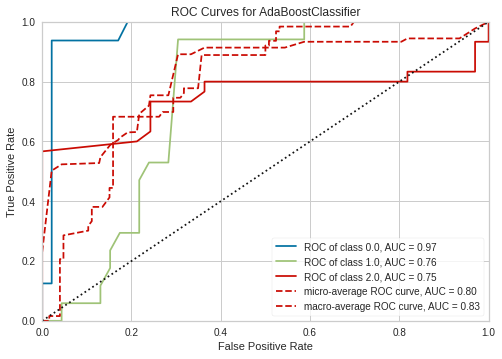

In [ ]:
plot_model(gbc)

In [ ]:
save_model(gbc, 'gbc_saved')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Grade',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strate...
                                             learning_rate=0.1, loss='deviance',
                                             max_depth=3, max_features=None,
                                             max_leaf_nodes=None,
                                             min_i

In [ ]:
import shutil

shutil.move('/content/gbc_saved.pkl' , '/content/drive/MyDrive/01_이미지데이터/')

'/content/drive/MyDrive/01_이미지데이터/gbc_saved.pkl'

In [ ]:
ada_saved = load_model('ada_saved')

Transformation Pipeline and Model Successfully Loaded


In [ ]:
blended = blend_models(estimator_list = best_5, fold = 5, method = 'soft')

In [ ]:
pred_holdout = predict_model(blended)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.5152,0,0.3333,0.4735,0.4916,-0.0492,-0.051


In [ ]:
!pip install joblib

In [ ]:
import pickle
import joblib
clf_from_joblib = joblib.load('/content/drive/MyDrive/01_이미지데이터/et_saved.pkl') 

In [ ]:
resault = ada_saved.predict(npersimmonDF)
print(resault)

[0 0 0 0 0 0 0 0 0 0 1 0 1 2 2 2 2 2 0 2 0 0 0 2 1 0 1 0 0 2 1 0 2 0 0 0 2
 2 2 1 1 1 2 1 0 2 1 1 2 0 2 2 2 2 1 0 2 2 1 1 1 1 0 1 0 1 1 1 1 2 2 2 2 2
 2 2 1 0 2 1 1 1 2 1 2 1 2 1 2 2 1 2 2 1 2 0 1 2 2 0 1 2 1 0 2 2 1 2 1 1 0
 2 1 0 2 1 1 2 1]
